### **Time Series forecasting using Tensorflow**

In [1]:
# DL needs
import tensorflow as tf
import keras as kr

# Data needs
import pandas as pd
from sklearn.model_selection import train_test_split

# Numerical computation needs
import numpy as np

# plotting needs
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# ensuring reproducibility
random_seed=42
tf.random.set_seed(random_seed)

import sys
sys.path.append('/home/rudraksha14/Desktop/RAY_RISE_ABOVE_YOURSELF/Programming/tensorflow/')

import important_functionalities as impf
import time_series_functionalities as tsf

2025-03-29 23:33:38.531100: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
### RESULTS:
baseline_results = {'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

model_1_results = {'mae': 568.06366,
 'mse': 1159591.9,
 'rmse': 1076.8435,
 'mape': 2.5265791,
 'mase': 0.9979305}

model_2_results = {'mae': 597.3115,
 'mse': 1246714.0,
 'rmse': 1116.5635,
 'mape': 2.696134,
 'mase': 1.0441062}

model_3_results = {'mae': 1272.8289,
 'mse': 5554035.5,
 'rmse': 2356.7002,
 'mape': 5.8320484,
 'mase': 2.2649276}

model_4_results = {'mae': 566.3369,
 'mse': 1167021.1,
 'rmse': 1080.2875,
 'mape': 2.5285356,
 'mase': 0.99489707}

model_5_results = {'mae': 567.6664,
 'mse': 1167780.1,
 'rmse': 1080.6388,
 'mape': 2.5524669,
 'mase': 0.9972326}

model_6_results = {'mae': 564.60266,
 'mse': 1159175.1,
 'rmse': 1076.6499,
 'mape': 2.5315979,
 'mase': 0.9918505}

model_7_results = {'mae': 584.861,
 'mse': 1223363.5,
 'rmse': 1106.0576,
 'mape': 2.6246307,
 'mase': 1.0274389}

model_8_mean_results = {'mae': 564.2059,
 'mse': 1138732.8,
 'rmse': 1067.1143,
 'mape': 2.5661576,
 'mase': 0.9911534}


model_8_median_results = {'mae': 565.84155,
 'mse': 1140681.2,
 'rmse': 1068.0269,
 'mape': 2.5704112,
 'mase': 0.9940269}

**29. Types of uncertainity in machine learning**

* There are two major types of uncertainity in ML 
  1. `Aleatoric Uncertainity`: This type of uncertainity cannot be reduced, and is often referred to `data uncertainity` or `subway uncertainity`.<br> eg: suppose your train was scheduled to arrive at 10.00 am, but usually it won't arrive exactly at 10.00 am (unless you leave in Japan, where subways are always on time). You can expect the train to arrive at 10.07, 10.08,...<br>We cannot reduce this uncertainity with more data, there will always be some uncertainity.<br><br>
   
  2. `Epistemic Uncertainity`: This type of uncertainity can be reduced, it is also referred to as `model uncertainity` or `coconut uncertainity`<br>eg: If you are on a beach, the chances of coconut falling on your head.If we go to a beach with no coconut trees, we reduce the chance of coconut falling on our head dramatically<br>This can be reduced with more data or changing the parameter inputted to our model.

* Uncertainity estimates in ML seek out to qualitatively and quantatively answer the questions:
  1. What can my model know ? (with perfect data, what's possible for a model to learn)
  2. What doesn't my model know ? (what can a model never predict OR would it be helpful if a modelcould tell you that when it's making a prediction, it doesn't know if it's right or not?)
   
* When measuring prediction intervals, we are estimating a form of aleatoric uncertainity.
* A forcaster should be held responsible for both aleatory and epistemic uncertainity.

**30. Future Prediction Model (Model 9)**

* We will train the model on the full historical data to make the predictions in future
* Previously all our created models have predicted on test dataset, however this is only a pseudo-future.
* In time-series forecasting, we need to retrain our model everytime we try to forecast/ before making our next forecast.

In [3]:
data = pd.read_csv('bitcoin_data.csv', parse_dates=['Date'], index_col=['Date'])
# parse the date column and tell pandas column 1 is date-time

In [4]:
# reduce the data to only have date and closing price of bit-coin
bitcoin_prices = pd.DataFrame(data["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [5]:
HORIZON = 1
WINDOW_SIZE = 7

bitcoin_prices_windowed = bitcoin_prices.copy()
for i in range(WINDOW_SIZE,0,-1):
    bitcoin_prices_windowed[f'Price+{WINDOW_SIZE-i+1}'] = bitcoin_prices['Price'].shift(periods=i)

bitcoin_prices_windowed

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.654990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.455000,NaN,NaN,NaN,NaN,NaN,NaN,123.654990
2013-10-03,108.584830,NaN,NaN,NaN,NaN,NaN,123.654990,125.455000
2013-10-04,118.674660,NaN,NaN,NaN,NaN,123.654990,125.455000,108.584830
2013-10-05,121.338660,NaN,NaN,NaN,123.654990,125.455000,108.584830,118.674660
...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,56583.849879,57107.120672,58788.209679,58102.191426,55715.546651,56573.555472,52147.821187
2021-05-15,50032.693137,57107.120672,58788.209679,58102.191426,55715.546651,56573.555472,52147.821187,49764.132082
2021-05-16,47885.625255,58788.209679,58102.191426,55715.546651,56573.555472,52147.821187,49764.132082,50032.693137


In [8]:
# create x - windows, and y - horizon features
X = bitcoin_prices_windowed.dropna().drop("Price",axis=1).astype(np.float32).to_numpy()
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32).to_numpy()
X,y

(array([[  123.65499,   125.455  ,   108.58483, ...,   121.33866,
           120.65533,   121.795  ],
        [  125.455  ,   108.58483,   118.67466, ...,   120.65533,
           121.795  ,   123.033  ],
        [  108.58483,   118.67466,   121.33866, ...,   121.795  ,
           123.033  ,   124.049  ],
        ...,
        [58788.21   , 58102.19   , 55715.547  , ..., 52147.82   ,
         49764.133  , 50032.69   ],
        [58102.19   , 55715.547  , 56573.555  , ..., 49764.133  ,
         50032.69   , 47885.625  ],
        [55715.547  , 56573.555  , 52147.82   , ..., 50032.69   ,
         47885.625  , 45604.617  ]], dtype=float32),
 array([  123.033  ,   124.049  ,   125.96116, ..., 47885.625  ,
        45604.617  , 43144.473  ], dtype=float32))

In [9]:
# Training model on entire data
train_features_dataset = tf.data.Dataset.from_tensor_slices(X)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y) 



# combine labels and features by zipping them together -> (features,labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset,train_labels_dataset))

# batch and prefetch
BATCH_SIZE = 1024 # N-BEATS paper uses a batch size of 1024
train_dataset = train_dataset.batch(batch_size=BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [83]:
# create the future prediction model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(HORIZON)
],name='model_9')

# compile the model
model_9.compile(loss = 'mae', 
                optimizer = tf.keras.optimizers.Adam())

# fit the model on entire data
model_9.fit(train_dataset,
            epochs = 100,
            verbose = 1
            )

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3132.4680 
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1558.4530
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 346.7625
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 746.5898
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 632.2772
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 293.3614
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 425.1404
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 374.2190
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 267.1199
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 331.8582
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 268.9433
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 269.3674
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 250.2522
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 246.7659
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 238.4091
E

**To make prediction in future, we want a function which:**
1. Takes as input:
   * a list of values (bitcoin-historical data).
   * a trained model (such as `model_9`).
   * a window into the future to predict (our `INTO_FUTURE` variable).
   * the window_size the model was trained on (`WINDOW_SIZE`), the model can only predict on the same kind of data it was trained on.
2. create an empty list for future forecasts, (this will be returned at end of the function, when it is full of predictions) and extracts the last `WINDOW_SIZE` values from the input values.
3. LOOP `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` sequences which update to remove the first value and append the latest prediction.

In [43]:
len(X)

2780

In [93]:
# making predictions in the future
import copy

INTO_FUTURE = 14 # how many time steps to predict in future

def make_future_forecasts(values,model,into_future, window_size =WINDOW_SIZE, train_dataset = None,retrain = False, epochs = 10) -> list:
    '''
    Makes future forecasts into_future steps after values ends.
    
    Returns future forecasts as a list of floats.
    '''

    # create an empty list
    future_forecasts = []
    last_window = values[-window_size:]

    if retrain:
        train_data = copy.deepcopy(train_dataset[0])
        train_labels = copy.deepcopy(train_dataset[1])
        model = copy.deepcopy(model)

    # make into_future number of predictions, altering the data which gets predicted on each turn
    for _ in range(into_future):
        # predict on last window, then append it again, again, again...
        # model will eventually start to forecast using its own forecasts
        future_pred = model.predict(tf.expand_dims(last_window,axis = 0),verbose=0)
        print(f'Predicting on:\n{last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n')

        # append the predictions to future_forcast
        future_forecasts.append(tf.squeeze(future_pred).numpy())

        # update the last window with new pred, and get WINDOW_SIZE most recent preds
        last_window = np.append(last_window,future_pred)[-window_size:]

        # retrain model everytime after prediction
        if retrain == True:
            print(f"Model retraining for {epochs} epochs before next prediction")
            window2append = np.append(train_data[-1],train_labels[-1])[-window_size:]
            
            train_data = np.append(train_data,np.expand_dims(window2append,axis = 0),axis = 0)
            train_labels =np.append(train_labels,tf.squeeze(future_pred).numpy())
        
            model.fit(train_data,train_labels,
            epochs = epochs,
            verbose = 0
            ) 
    return future_forecasts


**plotting model's future forecast**

In [180]:
INTO_FUTURE = 100
future_forecasts = make_future_forecasts(values = y,
                      model=model_9,
                      into_future=INTO_FUTURE,
                      window_size=WINDOW_SIZE,
                      retrain=False
                               )

retrained_future_forecasts =  make_future_forecasts(values = y,
                      model=model_9,
                      into_future=INTO_FUTURE,
                      window_size=WINDOW_SIZE,
                      train_dataset=(X,y),
                      retrain=True,
                      epochs=5
                               )

Predicting on:
[56573.555 52147.82  49764.133 50032.69  47885.625 45604.617 43144.473] -> Prediction: 43819.23828125

Predicting on:
[52147.82  49764.133 50032.69  47885.625 45604.617 43144.473 43819.24 ] -> Prediction: 43764.296875

Predicting on:
[49764.133 50032.69  47885.625 45604.617 43144.473 43819.24  43764.297] -> Prediction: 43597.23828125

Predicting on:
[50032.69  47885.625 45604.617 43144.473 43819.24  43764.297 43597.24 ] -> Prediction: 43239.2890625

Predicting on:
[47885.625 45604.617 43144.473 43819.24  43764.297 43597.24  43239.29 ] -> Prediction: 43184.046875

Predicting on:
[45604.617 43144.473 43819.24  43764.297 43597.24  43239.29  43184.047] -> Prediction: 43592.44140625

Predicting on:
[43144.473 43819.24  43764.297 43597.24  43239.29  43184.047 43592.44 ] -> Prediction: 43827.52734375

Predicting on:
[43819.24  43764.297 43597.24  43239.29  43184.047 43592.44  43827.527] -> Prediction: 44045.92578125

Predicting on:
[43764.297 43597.24  43239.29  43184.047 43592

In [181]:
timesteps = bitcoin_prices.index.to_numpy().astype('datetime64[D]')
timesteps

array(['2013-10-01', '2013-10-02', '2013-10-03', ..., '2021-05-16',
       '2021-05-17', '2021-05-18'], dtype='datetime64[D]')

In [182]:
def get_future_dates(start_date,into_future,offset=1):
    '''
    Returns array of date-time values ranging from start_date to start_date + into_future
    '''
    return np.array([start_date + np.timedelta64(i,'D') for i in range(1,into_future+1,offset)],dtype='datetime64[D]') # returns a date-range between start and end date



In [183]:
timesteps_into_future = get_future_dates(bitcoin_prices.index[-1],INTO_FUTURE)
timesteps_into_future

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01', '2021-06-02', '2021-06-03',
       '2021-06-04', '2021-06-05', '2021-06-06', '2021-06-07',
       '2021-06-08', '2021-06-09', '2021-06-10', '2021-06-11',
       '2021-06-12', '2021-06-13', '2021-06-14', '2021-06-15',
       '2021-06-16', '2021-06-17', '2021-06-18', '2021-06-19',
       '2021-06-20', '2021-06-21', '2021-06-22', '2021-06-23',
       '2021-06-24', '2021-06-25', '2021-06-26', '2021-06-27',
       '2021-06-28', '2021-06-29', '2021-06-30', '2021-07-01',
       '2021-07-02', '2021-07-03', '2021-07-04', '2021-07-05',
       '2021-07-06', '2021-07-07', '2021-07-08', '2021-07-09',
       '2021-07-10', '2021-07-11', '2021-07-12', '2021-07-13',
       '2021-07-14', '2021-07-15', '2021-07-16', '2021-07-17',
       '2021-07-18', '2021-07-19', '2021-07-20', '2021-

In [184]:
prices = bitcoin_prices['Price'].to_numpy()

# to handle disjointness
timesteps_into_future = np.insert(timesteps_into_future,0,timesteps[-1])
future_forecasts = np.insert(future_forecasts,0,prices[-1])
retrained_future_forecasts = np.insert(retrained_future_forecasts,0,prices[-1])

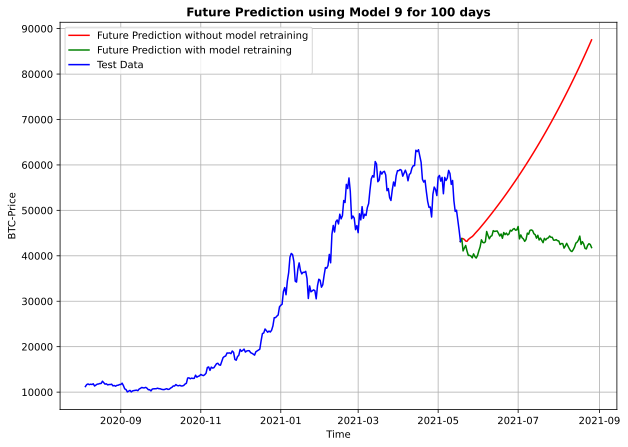

In [186]:
# plotting model_3 predictions
offset = 2500
end = None
plt.figure(figsize=(10,7))

# account for test_window offset and index into test_labels to ensure correct plotting
tsf.plot_time_series(timesteps = timesteps_into_future , values = future_forecasts,end=end,label = "Future Prediction without model retraining", format='-',color='red')

tsf.plot_time_series(timesteps = timesteps_into_future , values = retrained_future_forecasts,end=end,label = "Future Prediction with model retraining", format='-',color='green')

tsf.plot_time_series(timesteps = timesteps , values = prices ,start = offset,end=end,label = "Test Data",format='-',color = 'blue',ylabel='BTC-Price')

plt.title("Future Prediction using Model 9 for 100 days",fontsize = 12, fontweight='bold')
plt.show()

**NOTE: retraining the model definitely matters**

***-- CONTD IN NEXT NOTEBOOK --***